## <div style = "color:#fff ; background-color:#666 ; font-size:25px ; border-radius:25px ; padding:15px; text-align:center ;"> Loan Approval Prediction</div>

<img src = "https://www.cashe.co.in/wp-content/uploads/2024/01/Loan_Term.png" height = "100%" width ="100%" />

## <div style = "color:#fff ; background-color:#666 ; font-size:25px ; border-radius:25px ; padding:15px; text-align:center ;"> Importing Necessary Libraries</div>

In [1]:
# Importing Necessary libraries for Data handing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <div style = "color:#fff ; background-color:#666 ; font-size:25px ; border-radius:25px ; padding:15px; text-align:center ;">Loading Data</div>

In [2]:
# loading Data
df = pd.read_csv("../Data/train.csv")


In [3]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## <div style = "color:#fff ; background-color:#666 ; font-size:25px ; border-radius:25px ; padding:15px; text-align:center ;"> Exploratary Data Analysis</div>

In [4]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
print(f"Dimensions of the train data : {df.shape}")



for col in df.columns:
    print(f"No of unique values in {col} : {df[col].nunique()}")
    

Dimensions of the train data : (58645, 13)
No of unique values in id : 58645
No of unique values in person_age : 53
No of unique values in person_income : 2641
No of unique values in person_home_ownership : 4
No of unique values in person_emp_length : 36
No of unique values in loan_intent : 6
No of unique values in loan_grade : 7
No of unique values in loan_amnt : 545
No of unique values in loan_int_rate : 362
No of unique values in loan_percent_income : 61
No of unique values in cb_person_default_on_file : 2
No of unique values in cb_person_cred_hist_length : 29
No of unique values in loan_status : 2


In [6]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
df['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [8]:
dff = df[df['loan_status']==1]

In [21]:
dff.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,33000,RENT,6.0,PERSONAL,B,10000,11.12,0.30,N,2
1,22,30000,RENT,3.0,MEDICAL,D,5000,16.49,0.17,N,4
2,25,25000,RENT,3.0,VENTURE,C,3500,13.49,0.14,Y,3
3,30,54000,RENT,0.0,MEDICAL,B,12500,11.71,0.24,N,10
4,22,32000,RENT,6.0,EDUCATION,D,8000,15.58,0.25,N,3


In [10]:
dff = dff.drop(columns={'id','loan_status'}).reset_index(drop=True)

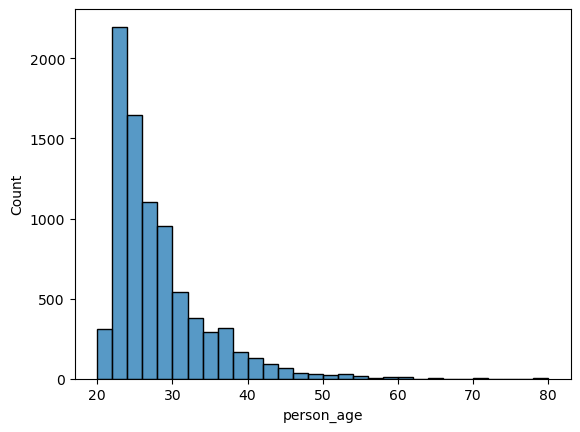

In [11]:
sns.histplot(x = dff['person_age'],bins =30)
plt.show()

<div style ='font-size:15px; background-color:#666 ;color: #fff; padding:15px; border-radius:15px;'>Right Skewed Data . Mostly youngsters are applying for loan</div>

In [12]:
dff['person_income'].describe()

count      8350.000000
mean      48224.661796
std       22435.665380
min        9600.000000
25%       32000.000000
50%       44000.000000
75%       59000.000000
max      397800.000000
Name: person_income, dtype: float64

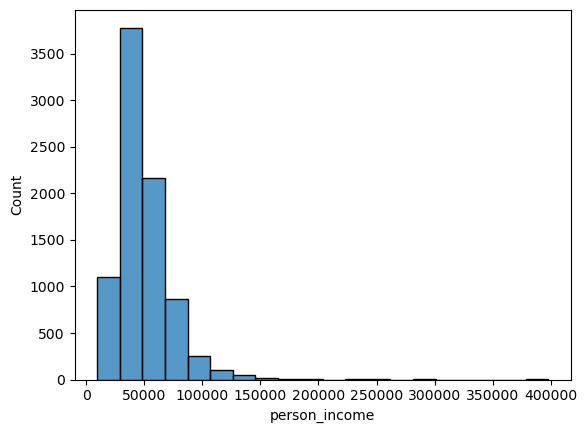

In [13]:
sns.histplot(x =dff['person_income'],bins =20)
plt.show()

<div style ='font-size:15px; background-color:#666 ;color: #fff; padding:15px; border-radius:15px;'>Most of them income is less than 25000 </div>

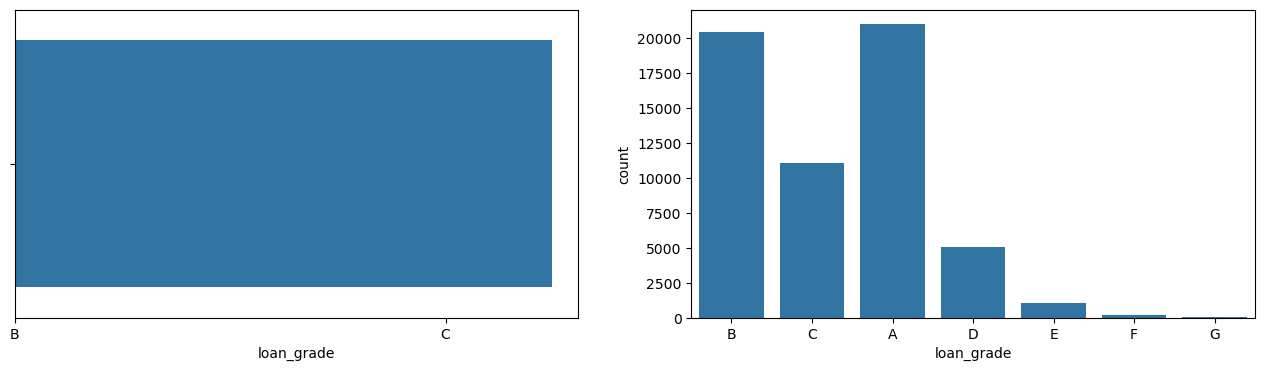

In [14]:
plt.figure(figsize= (16,4))

plt.subplot(1,2,1)
sns.barplot(data = df ,x= 'loan_grade',ci = None)
plt.subplot(1,2,2)
sns.countplot(data = df ,x='loan_grade')
plt.show()

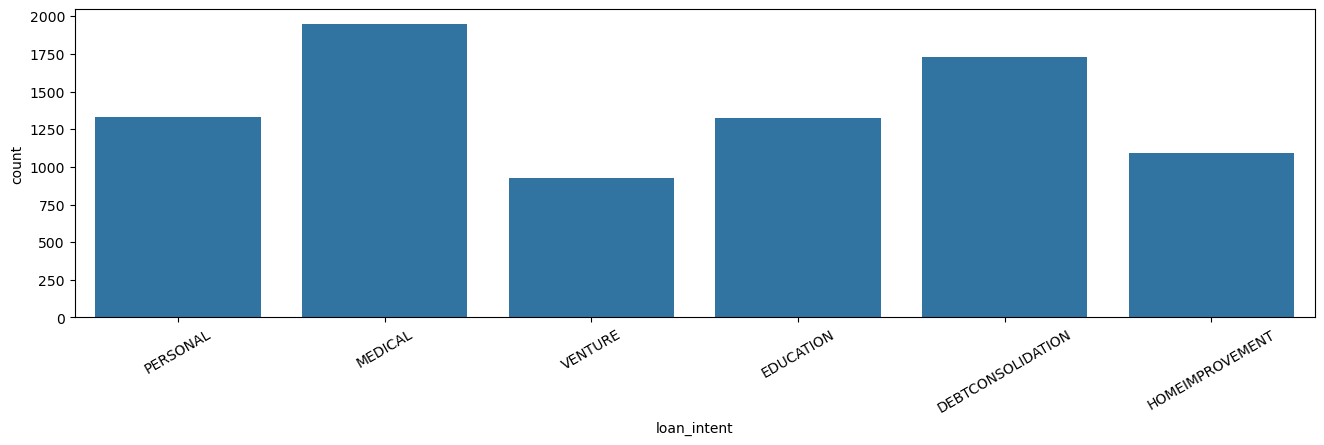

In [15]:
plt.figure(figsize= (16,4))

sns.countplot(data = dff ,x='loan_intent')
plt.xticks(rotation =30)

plt.show()

## <div style = "color:#fff ; background-color:#666 ; font-size:25px ; border-radius:25px ; padding:15px; text-align:center ;"> Data Preprocessing</div>

In [19]:
categoric_columns = dff.select_dtypes(include ='object').columns
numeric_columns =dff.select_dtypes(exclude = 'object').drop(columns='loan_amnt')
numeric_columns = numeric_columns.columns
categoric_columns ,numeric_columns

(Index(['person_home_ownership', 'loan_intent', 'loan_grade',
        'cb_person_default_on_file'],
       dtype='object'),
 Index(['person_age', 'person_income', 'person_emp_length', 'loan_int_rate',
        'loan_percent_income', 'cb_person_cred_hist_length'],
       dtype='object'))

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


dff[numeric_columns] = scaler.fit_transform(dff[numeric_columns])


In [59]:

    
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


for col in numeric_columns:
    dff[col] = label.fit_transform(dff[col])
        

In [17]:
x = dff.drop(columns = {'loan_amnt'})
y = dff['loan_amnt']


from sklearn.model_selection import train_test_split
x_train ,x_test , y_train ,y_test = train_test_split(x,y,test_size =0.2 ,random_state =42)

In [19]:
x_train.shape ,y_train.shape ,x_test.shape , y_test.shape

((46916, 23), (46916,), (11729, 23), (11729,))

## <div style = "color:#fff ; background-color:#666 ; font-size:25px ; border-radius:25px ; padding:15px; text-align:center ;"> Model Building</div>

In [20]:
from sklearn.tree import DecisionTreeClassifier


DT = DecisionTreeClassifier()

DT.fit(x_train , y_train)

DT_pred = DT.predict(x_test)





Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9914
           1       0.72      0.65      0.68      1815

    accuracy                           0.91     11729
   macro avg       0.83      0.80      0.81     11729
weighted avg       0.90      0.91      0.90     11729



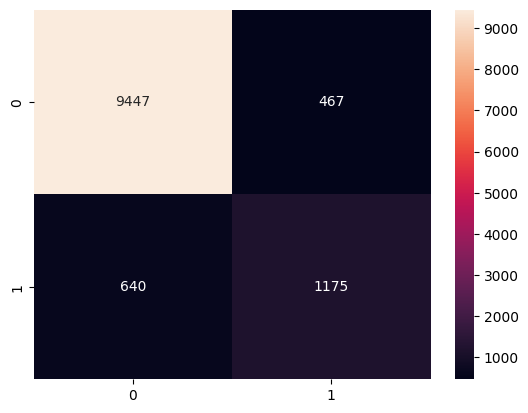

In [21]:
from sklearn.metrics import classification_report , confusion_matrix


cm =confusion_matrix(DT_pred ,y_test )

sns.heatmap(cm ,annot =True,fmt ='.0f')
print("Classification Report :")
print(classification_report(DT_pred,y_test))

In [22]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(x_train,y_train)

RF_pred = RF.predict(x_test)

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     10439
           1       0.72      0.91      0.80      1290

    accuracy                           0.95     11729
   macro avg       0.85      0.94      0.89     11729
weighted avg       0.96      0.95      0.95     11729



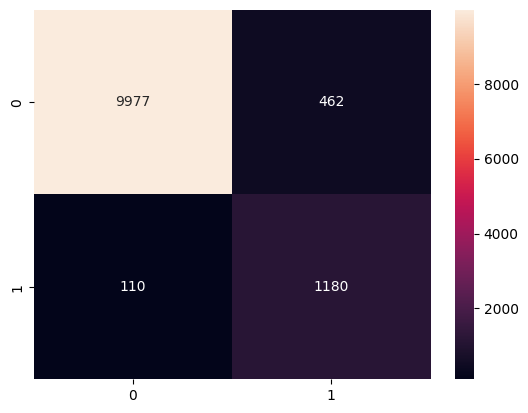

In [23]:

cm =confusion_matrix(RF_pred ,y_test )

sns.heatmap(cm ,annot =True,fmt ='.0f')
print("Classification Report :")
print(classification_report(RF_pred ,y_test))

In [24]:
from xgboost import XGBClassifier


xgb = XGBClassifier(
    learning_rate = 0.051113154,
    max_depth = 8,
    max_leaves = 15,
    colsample_bytree = 0.6,

    
    n_estimators = 250,
    random_state = 42,

    
)

xgb.fit(x_train,y_train)

xgb_pred = xgb.predict(x_test)



Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     10431
           1       0.72      0.91      0.80      1298

    accuracy                           0.95     11729
   macro avg       0.85      0.93      0.89     11729
weighted avg       0.96      0.95      0.95     11729



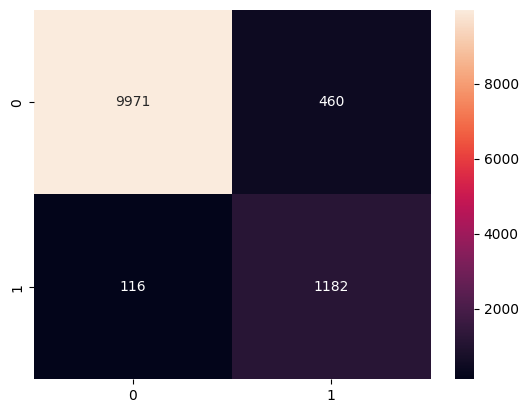

In [25]:

cm =confusion_matrix(xgb_pred ,y_test )

sns.heatmap(cm ,annot =True,fmt ='.0f')
print("Classification Report :")
print(classification_report(xgb_pred ,y_test))